# Extracting TotalGray From SUB 1

In [3]:
file_path = r"Z:\Pain_Data\preproc\sourcedata\freesurfer\sub-01\stats\aseg.stats"

#file_path = r"E:\Pain_Data\preproc\sourcedata\freesurfer\sub-01\stats\aseg.stats"

# Initialize variable to store TotalGray value
total_gray = None

# Open the file and search for the TotalGray line
with open(file_path, 'r') as file:
    for line in file:
        if "Measure TotalGray," in line:
            # Extract the fourth column (value of TotalGray)
            total_gray = line.split(",")[3].strip()
            break

if total_gray:
    print(f"TotalGray value: {total_gray}")
else:
    print("TotalGray not found in the file.")

TotalGray value: 539130.558278


In [ ]:
# testing branch pull request

# Extracting More Areas

In [4]:
def extract_gray_matter_volume(file_path, region_name):

    with open(file_path, 'r') as file:
        for line in file:
            # Skip header or comment lines
            if line.startswith('#') or line.startswith('ColHeaders'):
                continue
            
            # Split the line into columns
            columns = line.split()
            
            # Check if the first column matches the region name
            if columns[0].lower() == region_name.lower():
                # Extract the gray matter volume (column 4)
                gray_vol = float(columns[3])
                return gray_vol
    
    # Return None if the region is not found
    return None

#gray_matter_volume = extract_gray_matter_volume(file_path, region_name)
'''
if gray_matter_volume is not None:
    print(f"The gray matter volume of the {region_name} is {gray_matter_volume} mm³.")
else:
    print(f"{region_name} not found in the file.")
'''
region_name= "insula"
file_path1 = r"Z:\Pain_Data\preproc\sourcedata\freesurfer\sub-01\stats\lh.aparc.stats"
insulaGV= extract_gray_matter_volume(file_path1, "insula")
if insulaGV is not None:
    print(f"The gray matter volume of the {region_name} is {insulaGV} mm³.")
else:
    print(f"{region_name} not found in the file.")


The gray matter volume of the insula is 6785.0 mm³.


# Imports

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bambi as bmb
#import setuptools.dist
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
#!python --version




WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
# testing pull request

# Extracting TotalGray From All Subjects

In [52]:


def extract_total_gray_matter_volume(aseg_stats_path):
    # Initialize variable to store TotalGray value
    total_gray = None

# Open the file and search for the TotalGray line
    with open(aseg_stats_path, 'r') as file:
        for line in file:
            if "Measure TotalGray," in line:
                # Extract the fourth column (value of TotalGray)
                total_gray = line.split(",")[3].strip()
                break

    if total_gray:
        # print(f"TotalGray value: {total_gray}")
        return total_gray
    else:
        # print("TotalGray not found in the file.")
        return None
    
# Extract gray matter volumes for all subjects
base_dir = r"Z:\Pain_Data\preproc\sourcedata\freesurfer"  # Base directory for FreeSurfer data
#base_dir= r"E:\Pain_Data\preproc\sourcedata\freesurfer"


subjects_names= os.listdir(base_dir)
## sort the list of subjects (in my PC it was unsorted) (LC)
sorted_subjects = sorted(subjects_names, key=lambda x: int(x.split('-')[1]) if len(x.split('-')) > 1 else float('inf'))
## and remove the last value- fsaverage (LC)
sorted_subjects=sorted_subjects[:-1]



'''
subject_dirs = [
    os.path.join(base_dir, sub, 'stats', 'aseg.stats')
    for sub in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, sub))
]

subject_dirs = subject_dirs[1:] 
'''
## Iterate over sorted subjects rather than entire folder (os.listdir(base_dir)) (LC)
subject_dirs = [
    os.path.join(base_dir, sub, 'stats', 'aseg.stats')
    for sub in sorted_subjects
    if os.path.isdir(os.path.join(base_dir, sub))
]
subject_TotalGray_data = []


for aseg_path in subject_dirs:

## adding if statment to ignore fsaverage folder (LC)
    if 'fsaverage' in os.path.basename(aseg_path):
        continue

    subject_id = os.path.basename(os.path.dirname(os.path.dirname(aseg_path)))
    gray_matter_volume = extract_total_gray_matter_volume(aseg_path)
    
def extract_multiple_GV(aseg_path , region_names):
    
    directory = os.path.dirname(aseg_path)
    
    for region in region_names:
        lh_path = os.path.join(directory,"lh.aparc.stats")
        lh_GV = extract_gray_matter_volume(lh_path, region)
        rh_path=  os.path.join(directory,"rh.aparc.stats")
        rh_GV = extract_gray_matter_volume(rh_path, region)
    
    if gray_matter_volume is not None:
        subject_TotalGray_data.append({'Subject no.': subject_id, 'TotalGrayMatterVolume': gray_matter_volume,"insula": lh_GV+rh_GV })
    
   # if gray_matter_volume is not None:
     #   subject_TotalGray_data.append({"lh_insula": lh_GV, 'rh_insula': rh_GV})
    
gray_matter_df = pd.DataFrame(subject_TotalGray_data)
print(gray_matter_df)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Z:\\Pain_Data\\preproc\\sourcedata\\freesurfer'

# Extracting Patient Data

In [7]:
# Step 3: Load demographic data
Patient_Data_path = r"C:\Users\zevel\Downloads\שנה ג\PainAnalysisMaabada\Copy of data_Pre_Post_Placebo_paper_2016_Tetreault_P (2).csv" 
#patient_data_path= r"C:\Lital2021\Cognitive sciences\Research chronic pain\OpenNeuro Osteoarithritis knee pain\Pain_data_Tetreault_Pascal_with_subjectID.xlsx"
#Patient_Data = pd.read_excel(Patient_Data_path)
Patient_Data = pd.read_csv(Patient_Data_path)

# Step 4: Merge gray matter data with demographics using "Subject no."
merged_data = pd.merge(Patient_Data, gray_matter_df, on="Subject no.", how="inner")

## add print (LC)
print(merged_data)






         Study subject ID  gender 01 gender  age  Duration group  BDI-S1  \
0      Control      con01          0      F   59       NaN   con       0   
1      Control      con02          1      M   59       NaN   con       0   
2      Control      con03          1      M   52       NaN   con       2   
3      Control      con04          1      M   48       NaN   con       1   
4      Control      con05          1      M   78       NaN   con       0   
..         ...        ...        ...    ...  ...       ...   ...     ...   
71  Validation      oa906          1      M   49      30.0  nres      16   
72  Validation      oa907          1      M   73       5.0  nres      41   
73  Validation      oa908          0      F   63      26.0  nres      11   
74  Validation      oa909          0      F   70      10.0  nres       9   
75         DLX      OA912          1      M   64      30.0  nres       2   

    BDI-S2  PCS-S1  ...  WOMAC-S2  %CH-WOMAC  group WOMAC  VAS-S1  VAS-S2  \
0      NaN

# Encoding the Variables

In [8]:
# Categorize subjects into "Control" and "Chronic Pain" groups
def assign_group(subject_no):
    subject_number = int(subject_no.split('-')[1])  # Extract the numeric part of Subject no.
    return "Control" if subject_number <= 20 else "Chronic Pain"

merged_data['PainGroup'] = merged_data['Subject no.'].apply(assign_group) # New column

# Encode categorical variables (PainGroup)
label_encoder = LabelEncoder()
merged_data['PainGroupEncoded'] = merged_data['PainGroup'].map({"Control": 0, "Chronic Pain": 1})




# Visualising the Data

C:\Users\zevel\AppData\Local\Temp\ipykernel_26480\2005303972.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='PainGroup', y='insula', palette='Greens')


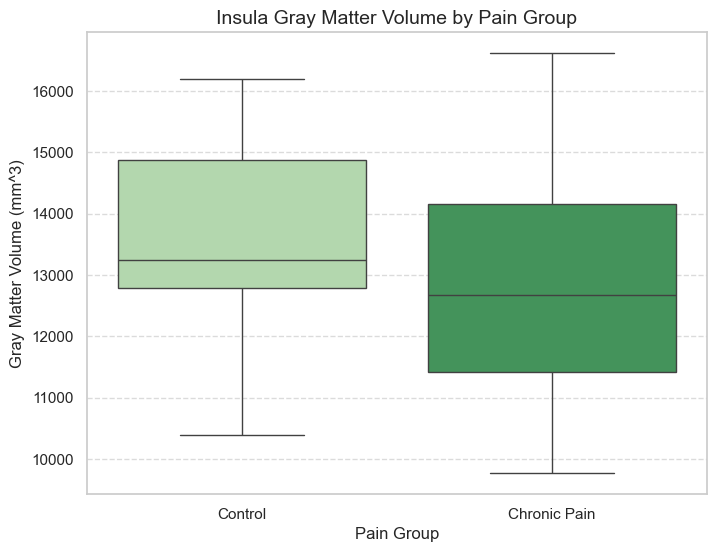

C:\Users\zevel\AppData\Local\Temp\ipykernel_26480\2005303972.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_data, x="PainGroup", y="insula", palette="Greens")
C:\Users\zevel\AppData\Local\Temp\ipykernel_26480\2005303972.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='gender', y='insula', palette='Set3')


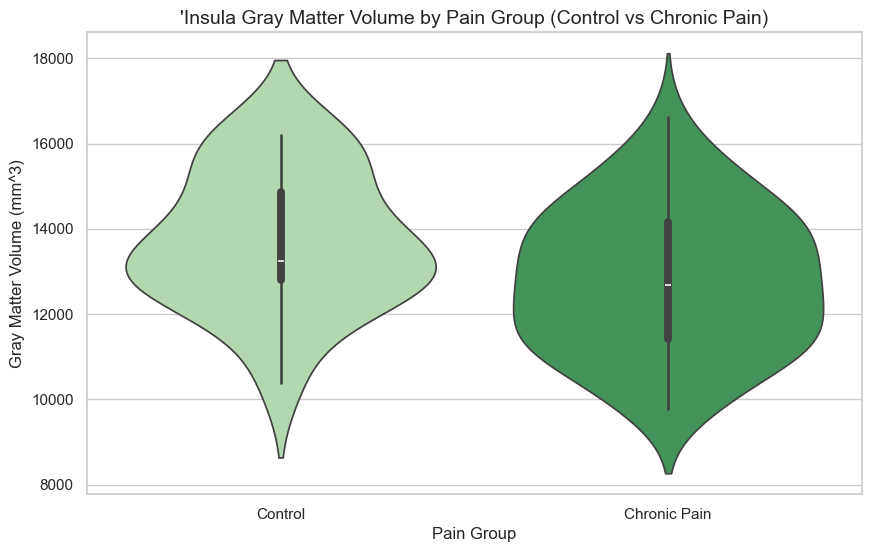

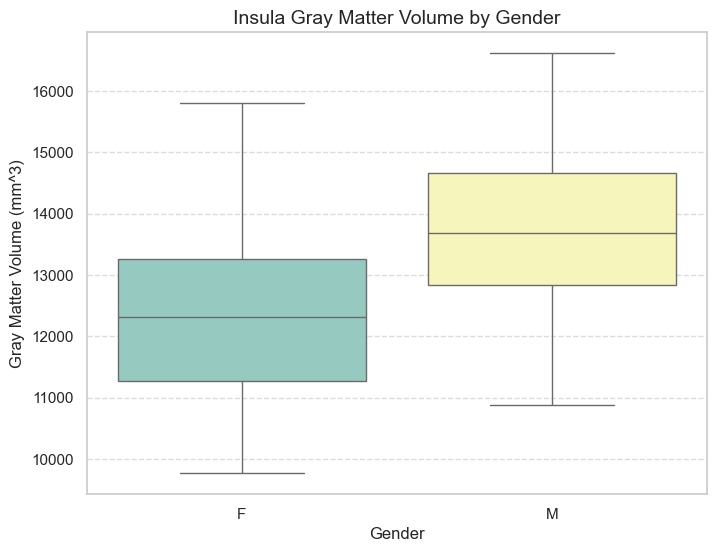

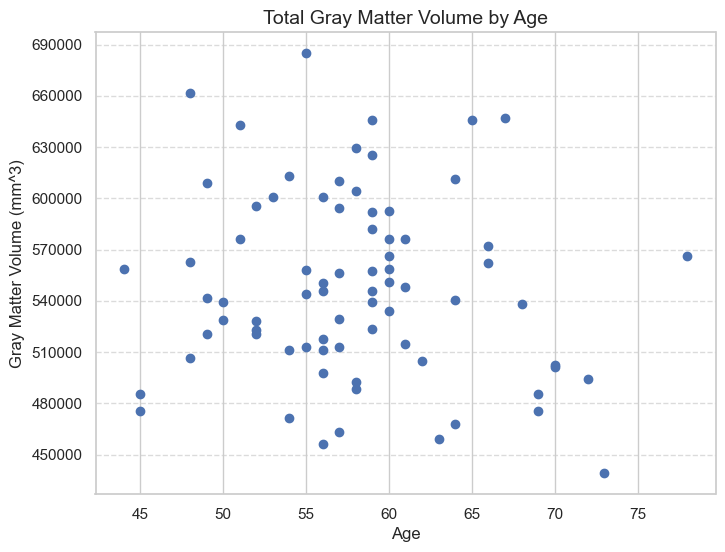

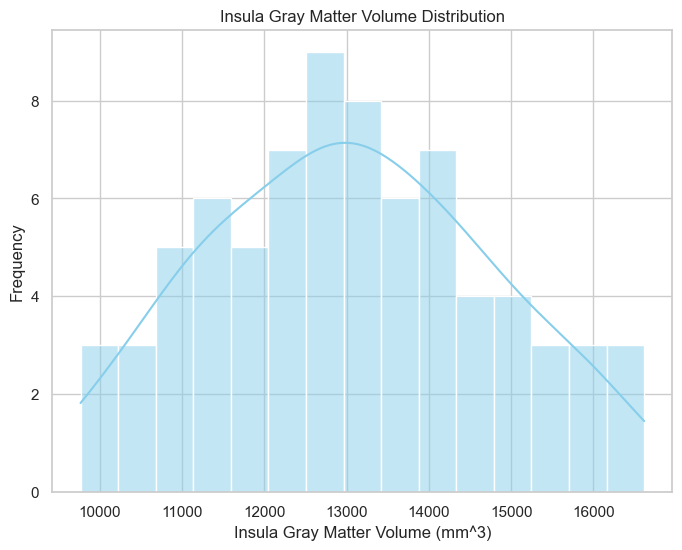

C:\Users\zevel\AppData\Local\Temp\ipykernel_26480\2005303972.py:83: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(


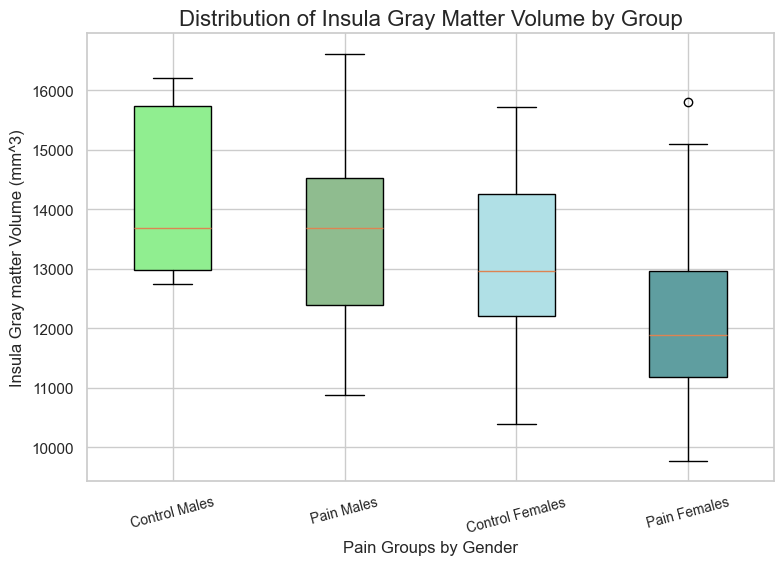

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create the boxplot for 'insula' grouped by 'PainGroupEncoded'
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='PainGroup', y='insula', palette='Greens')

# Add labels and title for better clarity
plt.title('Insula Gray Matter Volume by Pain Group', fontsize=14)
plt.xlabel('Pain Group', fontsize=12)
plt.ylabel('Gray Matter Volume (mm^3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Set the visual style
sns.set(style="whitegrid")

# Create a violin plot for insula distribution by PainGroup
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x="PainGroup", y="insula", palette="Greens")

# Add title and labels
plt.title("'Insula Gray Matter Volume by Pain Group (Control vs Chronic Pain)", fontsize=14)
plt.xlabel("Pain Group", fontsize=12)
plt.ylabel("Gray Matter Volume (mm^3)", fontsize=12)

#Gender Data
plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x='gender', y='insula', palette='Set3')

# Add labels and title for better clarity
plt.title('Insula Gray Matter Volume by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Gray Matter Volume (mm^3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Age Data
merged_data['TotalGrayMatterVolume'] = pd.to_numeric(merged_data['TotalGrayMatterVolume'], errors='coerce')
plt.figure(figsize=(8, 6))
plt.scatter(data=merged_data, x='age', y='TotalGrayMatterVolume')

# Add labels and title
plt.title('Total Gray Matter Volume by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Gray Matter Volume (mm^3)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
# plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(round(x)):,}'))
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(merged_data['insula'], kde=True, color="skyblue", bins=15)
plt.title("Insula Gray Matter Volume Distribution")
plt.xlabel("Insula Gray Matter Volume (mm^3)")
plt.ylabel("Frequency")
plt.show()

# Prepare the data for the box plot by adding a "Group" column based on the conditions
merged_data['Group'] = None
merged_data.loc[(merged_data['PainGroupEncoded'] == 0) & (merged_data['gender'] == 'M'), 'Group'] = 'Control Males'
merged_data.loc[(merged_data['PainGroupEncoded'] == 1) & (merged_data['gender'] == 'M'), 'Group'] = 'Pain Males'
merged_data.loc[(merged_data['PainGroupEncoded'] == 0) & (merged_data['gender'] == 'F'), 'Group'] = 'Control Females'
merged_data.loc[(merged_data['PainGroupEncoded'] == 1) & (merged_data['gender'] == 'F'), 'Group'] = 'Pain Females'

# Filter out rows where Group is None to ensure valid data
filtered_df = merged_data[merged_data['Group'].notna()]

# Define the desired order of the groups
group_order = ['Control Males', 'Pain Males', 'Control Females', 'Pain Females']



# Convert the 'Group' column to a categorical type with the desired order
filtered_df['Group'] = pd.Categorical(filtered_df['Group'], categories=group_order, ordered=True)

# Define custom colors for the groups
colors = ['lightgreen', 'darkseagreen', 'powderblue', 'cadetblue']

# Create a boxplot using matplotlib directly for customization
plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(
    [filtered_df[filtered_df['Group'] == group]['insula'] for group in group_order],
    patch_artist=True,  # Enable custom box styles
    labels=group_order
)

# Apply custom colors to each box
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Distribution of Insula Gray Matter Volume by Group', fontsize=16)
plt.suptitle('')  # Remove the default subplot title
plt.ylabel('Insula Gray matter Volume (mm^3)', fontsize=12)
plt.xlabel('Pain Groups by Gender', fontsize=12)
plt.xticks(rotation=15, fontsize=10)
plt.tight_layout()
plt.show()


# Performing T - Test

In [10]:
from scipy.stats import ttest_ind

# Extract the two groups based on PainGroupEncoded
group_0 = merged_data[merged_data['PainGroupEncoded'] == 0]['insula'].dropna()
group_1 = merged_data[merged_data['PainGroupEncoded'] == 1]['insula'].dropna()

# Perform a one-tailed t-test
t_stat, p_value = ttest_ind(group_0, group_1, alternative='greater')  # hypothesis- group 0 has a larger insula GV

# Display results
print(t_stat, p_value)


import pingouin as pg

# Extract the two groups based on PainGroupEncoded
group_0 = merged_data[merged_data['PainGroupEncoded'] == 0]['insula'].dropna()
group_1 = merged_data[merged_data['PainGroupEncoded'] == 1]['insula'].dropna()

# Perform an independent t-test
results_group = pg.ttest(group_0, group_1, alternative='greater') #pingouin defaults to Welch's t-test, which is designed for cases where the two groups may have unequal variances.

# Extract the two groups based on PainGroupEncoded
group_F = merged_data[merged_data['gender 01'] == 0]['insula'].dropna()
group_M = merged_data[merged_data['gender 01'] == 1]['insula'].dropna()

# Perform an independent t-test
results_gender = pg.ttest(group_F, group_M, alternative='less') #pingouin defaults to Welch's t-test, which is designed for cases where the two groups may have unequal variances.

# Display the results
print(results_group)

# Display the results
print(results_gender)



2.1180553577408583 0.018764442690320713
               T       dof alternative     p-val          CI95%   cohen-d  \
T-test  2.167895  35.02223     greater  0.018524  [201.92, inf]  0.551741   

         BF10     power  
T-test  3.692  0.675004  
              T        dof alternative     p-val           CI95%   cohen-d  \
T-test -3.77797  73.870347        less  0.000159  [-inf, -756.7]  0.864933   

           BF10     power  
T-test  162.761  0.981481  


# Baysian Model
For now- Insula GV


In [ ]:
# # Building the Bayesian model- no scale
# model = bmb.Model(
#     "insula ~ age + gender 01+ PainGroupEncoded", 
#     merged_data, 
#     family="gaussian" #the Insula GV is ~ normally distributed
# )

# # Fit the model
# results = model.fit()

y = 'insula'
X = ['age', 'gender 01', 'PainGroupEncoded']


# Scale only the relevant columns (age, gender, chronic pain, gray matter volume)
df_scaled = merged_data[X].copy()  # Create a DataFrame with just the X variables
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_scaled)  # Scale the selected columns

# Convert back to a pandas DataFrame with the same column names
df_scaled = pd.DataFrame(scaled_values, columns=X)
df_scaled.rename(columns={"gender 01": "gender_01"}, inplace=True)
print(df_scaled.columns)

# Add the target variable to the scaled DataFrame
df_scaled[y] = merged_data[y]

# Building the Bayesian model
model1 = bmb.Model(
    "insula ~ age + gender_01 + PainGroupEncoded", 
    df_scaled, 
    family="gaussian"  # The Insula GV is ~ normally distributed
)

# Fit the model using MCMC
trace1 = model1.fit()


Index(['age', 'gender_01', 'PainGroupEncoded'], dtype='object')


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, Intercept, age, gender_01, PainGroupEncoded]


c:\Users\zevel\Downloads\שנה 
ג\PainAnalysisMaabada\git\Pain_Gray_Matter_Analysis\myenv\Lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 355 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


AttributeError: 'InferenceData' object has no attribute 'summary'

                       mean       sd     hdi_3%    hdi_97%  mcse_mean  \
sigma              1552.958  129.864   1333.266   1808.426      2.435   
Intercept         13032.465  171.158  12701.730  13344.274      3.023   
age                  24.063  180.107   -319.084    354.428      3.458   
gender_01           672.823  172.794    366.051   1004.394      3.778   
PainGroupEncoded   -380.170  183.674   -713.754    -24.299      3.215   

                  mcse_sd  ess_bulk  ess_tail  r_hat  
sigma               1.738    2865.0    1471.0    1.0  
Intercept           2.139    3206.0    1697.0    1.0  
age                 4.178    2732.0    1466.0    1.0  
gender_01           2.672    2105.0    1508.0    1.0  
PainGroupEncoded    2.428    3232.0    1969.0    1.0  
Data variables:
    sigma             (chain, draw) float64 16kB 1.84e+03 1.38e+03 ... 1.543e+03
    Intercept         (chain, draw) float64 16kB 1.328e+04 ... 1.298e+04
    age               (chain, draw) float64 16kB -203.7 134.7

array([[<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gender_01'}>,
        <Axes: title={'center': 'PainGroupEncoded'}>, <Axes: >]],
      dtype=object)

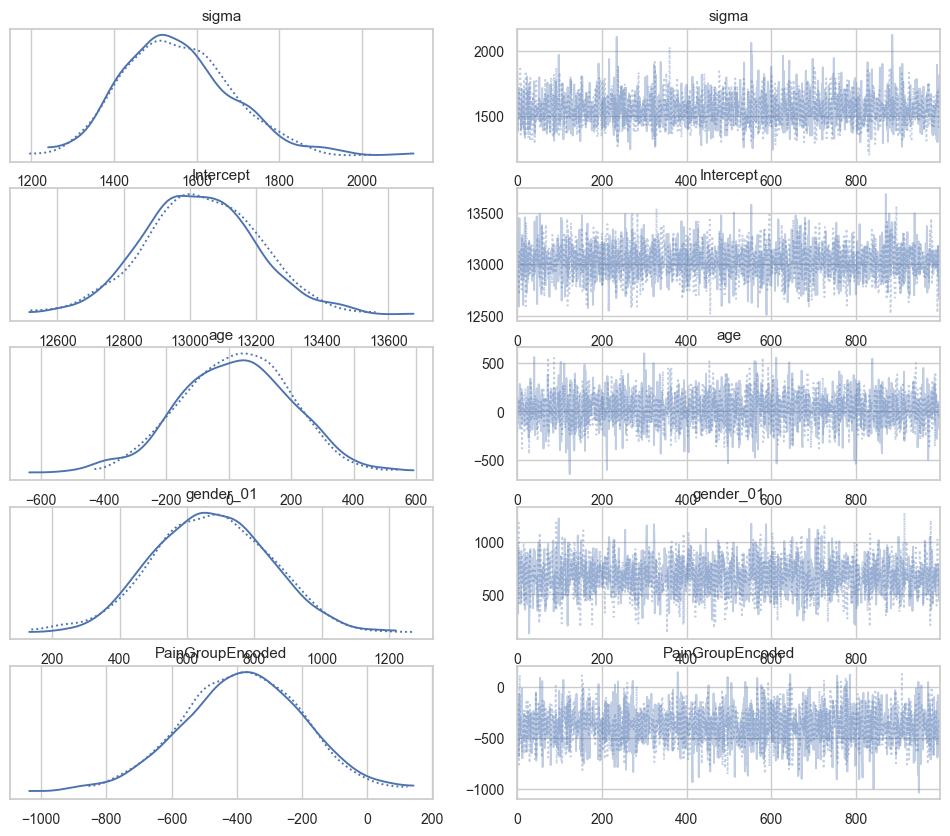

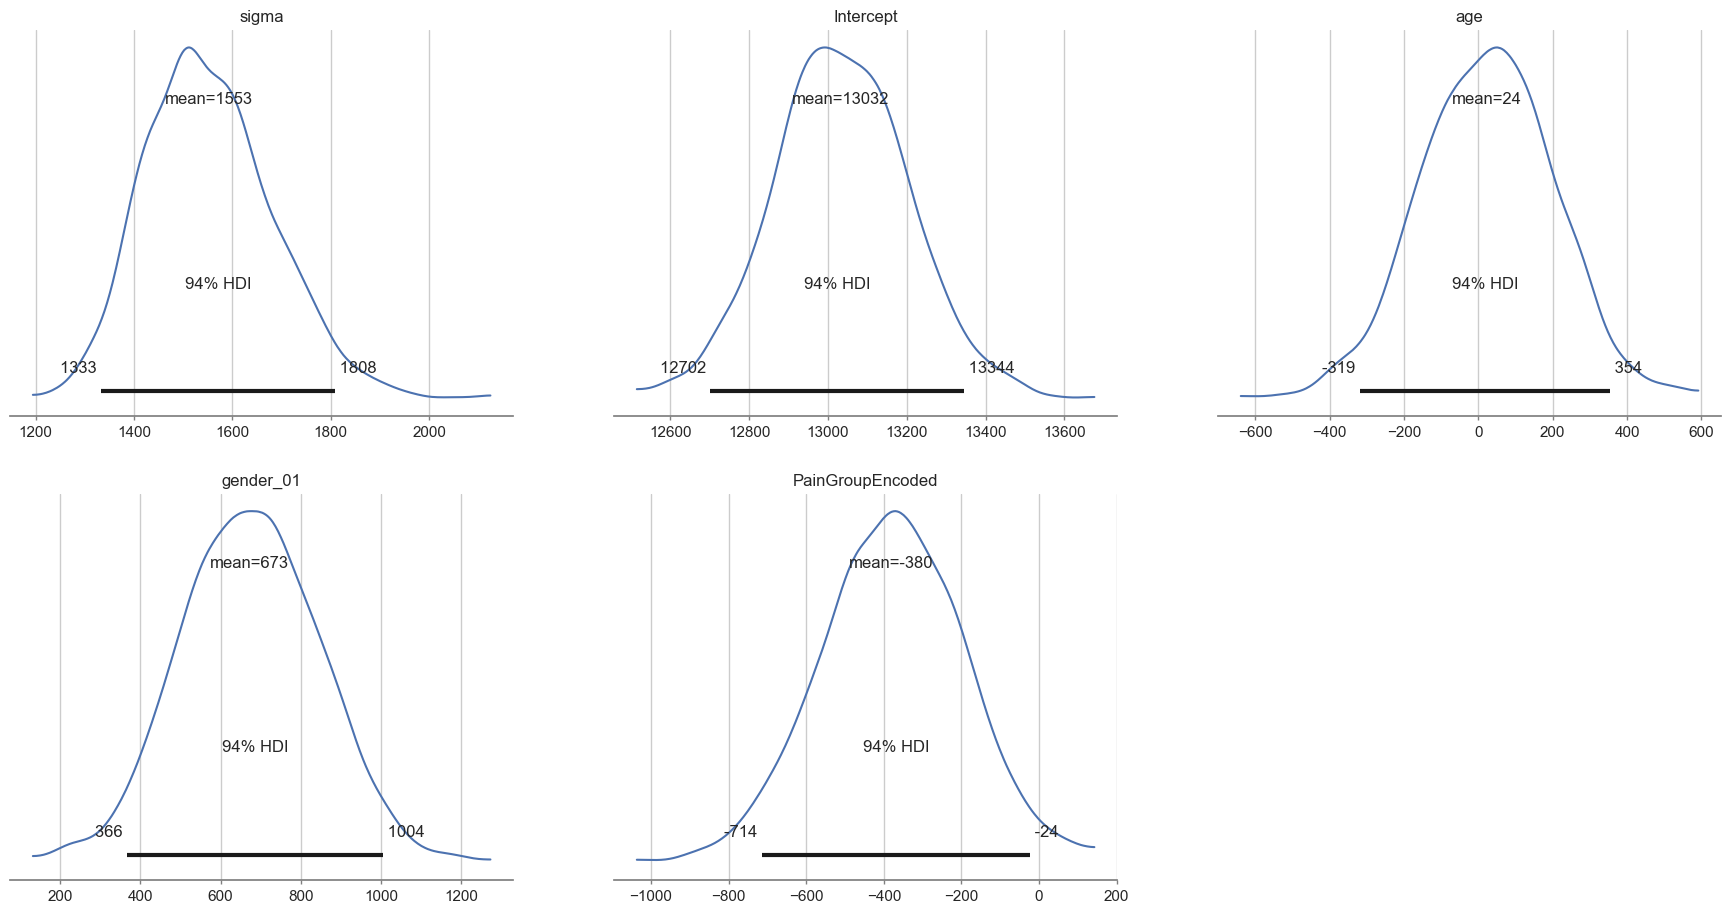

In [37]:
import arviz as az

# Summary of the posterior distribution
print(az.summary(trace1))
print(trace1.posterior.data_vars)

# Trace plots to check sampling
az.plot_trace(trace1)

az.plot_posterior(trace1)


In [28]:
# Check the model
print(model1)

# Check the trace
print(trace1)

       Formula: insula ~ age + gender_01 + PainGroupEncoded
        Family: gaussian
          Link: mu = identity
  Observations: 76
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 13035.2105, sigma: 4213.729)
            age ~ Normal(mu: 0.0, sigma: 4213.729)
            gender_01 ~ Normal(mu: 0.0, sigma: 4213.729)
            PainGroupEncoded ~ Normal(mu: 0.0, sigma: 4213.729)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1685.4916)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()
Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data


# Preparing Data for Regression

In [126]:
# Impute missing values in the control group- Is this the right approach? (SE)
merged_data['VAS-S1_0'] = merged_data['VAS-S1'].fillna(0)
merged_data['WOMAC-S1_0'] = merged_data['WOMAC-S1'].fillna(0)

X = merged_data[['age', 'gender 01', 'PainGroupEncoded']]  # Predictors
y = merged_data['TotalGrayMatterVolume']  # Target variable



0     13852.0
1     16199.0
2     12873.0
3     14791.0
4     13301.0
       ...   
71    12295.0
72    10876.0
73    10296.0
74    10271.0
75    14857.0
Name: insula, Length: 76, dtype: float64


# Standardizing the Data

In [70]:
#  When using non-standard variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test split 
This is an example for our understanding, these variables are not used in the cross validation. There it is done again

In [71]:
# Train-test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train-dev split (from the remaining 80% which is X_train_full)
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42) #this is done again in the cross validation

## Adding stratification (preserving the percentage of samples for each class) (LC)
merged_data['StratifyGroup'] = merged_data['PainGroupEncoded'].astype(str) + "_" + merged_data['gender'].astype(str) 
X_train_strat_full, X_test_strat, y_train_strat_full, y_test_strat = train_test_split(X, y, test_size=0.2, stratify=merged_data['StratifyGroup'], random_state=42) #this is done again in the cross validation
X_train_strat, X_dev_strat, y_train_strat, y_dev_strat = train_test_split(X_train_strat_full, y_train_strat_full, test_size=0.2, random_state=42) 


# Print sizes to verify the splits
print(f"Train size: {len(X_train)}")
print(f"Dev size: {len(X_dev)}")
print(f"Test size: {len(X_test)}")

Train size: 48
Dev size: 12
Test size: 16


# Cross Validation on Train subjects

In [72]:
# Add stratification columns
merged_data['StratifyGroup'] = merged_data['PainGroupEncoded'].astype(str) + "_" + merged_data['gender'].astype(str)
stratify_groups = merged_data['StratifyGroup']

X_train_full, X_test, y_train_full, y_test, stratify_train_full, stratify_test = train_test_split(
X, y, stratify_groups, test_size=0.2, stratify=stratify_groups, random_state=42)

# Number of folds
n_splits = 5
stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Convert X_train  and Y_train to a NumPy array
X_train_np = X_train_full.to_numpy()
y_train_np = y_train_full.to_numpy()
stratify_train_np = stratify_train_full.to_numpy()

r2_scores = []
mse_scores = []

# Cross-validation
for fold, (train_index, dev_index) in enumerate(stratified_kf.split(X_train_np, stratify_train_np)): # this split ensures the proportion of each class label in y is maintained in both the training and validation sets.
    # Split into training and validation sets
    X_train_fold, X_dev_fold = X_train_np[train_index], X_train_np[dev_index]
    y_train_fold, y_dev_fold = y_train_np[train_index], y_train_np[dev_index]
    
    # Train the model
    model = LinearRegression()  
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation set
    y_dev_pred = model.predict(X_dev_fold)
    
    # Compute metrics
    mse = mean_squared_error(y_dev_fold, y_dev_pred)
    r2 = r2_score(y_dev_fold, y_dev_pred)
    
    # Append metrics to the lists
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"Fold {fold+1}: MSE = {mse:.2f}, R^2 = {r2:.2f}")

# Calculate average metrics
avg_mse = sum(mse_scores) / len(mse_scores)
avg_r2 = sum(r2_scores) / len(r2_scores)

print("\nCross-Validation Performance:")
print(f"Average MSE: {avg_mse:.2f}")
print(f"Average R^2: {avg_r2:.2f}")

Fold 1: MSE = 2042814795.91, R^2 = -1.01
Fold 2: MSE = 2913819651.25, R^2 = -0.10
Fold 3: MSE = 4966530017.05, R^2 = -0.13
Fold 4: MSE = 3158014345.01, R^2 = 0.01
Fold 5: MSE = 1448020463.90, R^2 = 0.13

Cross-Validation Performance:
Average MSE: 2905839854.62
Average R^2: -0.22


# Evaluating the Final Model on X_test, y_test

In [73]:
# Train the final model on the entire training set
final_model = LinearRegression()  
final_model.fit(X_train_full, y_train_full)

# Predict on the test set
y_test_pred = final_model.predict(X_test)

# Evaluate the final model on the test set
from sklearn.metrics import mean_squared_error, r2_score
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test R^2: {r2_test:.2f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Finding feature importance
print("\nFeature Importance:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")


Test Set Performance:
Test MSE: 1777866886.15
Test R^2: 0.28
Coefficients: [ -909.56094227 40208.74856997 37650.2137981  -1563.19315191
 -7568.58485512  -300.75219712]
Intercept: 610565.7216898669

Feature Importance:
age: -909.561
gender 01: 40208.749
PainGroupEncoded: 37650.214
BDI-S1: -1563.193
VAS-S1_0: -7568.585
WOMAC-S1_0: -300.752


# Turning All Of This Into a Function

In [74]:
def Lin_Regress(x_cols):
    
    print(f"\nRegressors: {x_cols} ")
    print()

    
    X = merged_data[x_cols]
    y = merged_data['GrayMatterVolume']  # Target variable
    
    # Add stratification columns
    merged_data['StratifyGroup'] = merged_data['PainGroupEncoded'].astype(str) + "_" + merged_data['gender'].astype(str)
    stratify_groups = merged_data['StratifyGroup']



    # Train-test split
    X_train_full, X_test, y_train_full, y_test, stratify_train_full, stratify_test = train_test_split(
    X, y, stratify_groups, test_size=0.2, stratify=stratify_groups, random_state=42
)

    # Number of folds
    n_splits = 5
    stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Convert X_train  and Y_train to a NumPy array
    X_train_np = X_train_full.to_numpy()
    y_train_np = y_train_full.to_numpy()
    stratify_train_np = stratify_train_full.to_numpy()

    r2_scores = []
    mse_scores = []

    # Cross-validation
    for fold, (train_index, dev_index) in enumerate(stratified_kf.split(X_train_np, stratify_train_np)): # this split ensures the proportion of each class label in y is maintained in both the training and validation sets.
        # Split into training and validation sets
        X_train_fold, X_dev_fold = X_train_np[train_index], X_train_np[dev_index]
        y_train_fold, y_dev_fold = y_train_np[train_index], y_train_np[dev_index]
        
        # Train the model
        model = LinearRegression()  
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation set
        y_dev_pred = model.predict(X_dev_fold)
        
        # Compute metrics
        mse = mean_squared_error(y_dev_fold, y_dev_pred)
        r2 = r2_score(y_dev_fold, y_dev_pred)
        
        # Append metrics to the lists
        mse_scores.append(mse)
        r2_scores.append(r2)
        
        print(f"Fold {fold+1}: MSE = {mse:.2f}, R^2 = {r2:.2f}")

    # Calculate average metrics
    avg_mse = sum(mse_scores) / len(mse_scores)
    avg_r2 = sum(r2_scores) / len(r2_scores)

    print("\nCross-Validation Performance:")
    print(f"Average MSE: {avg_mse:.2f}")
    print(f"Average R^2: {avg_r2:.2f}")
    
    # Train the final model on the entire training set
    final_model = LinearRegression() 
    final_model.fit(X_train_full, y_train_full)

    # Predict on the test set
    y_test_pred = final_model.predict(X_test)

    # Evaluate the final model on the test set
    #from sklearn.metrics import mean_squared_error, r2_score
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("\nTest Set Performance:")
    print(f"Test MSE: {mse_test:.2f}")
    print(f"Test R^2: {r2_test:.2f}")
    print("Coefficients", model.coef_)
    print("Intercept:", model.intercept_)
    #add more tests
    
    
    return mse_test, r2_test, model.coef_, model.intercept_



In [75]:
def Lin_Regress(x_cols):
    
    print(f"\nRegressors: {x_cols} ")
    print()

    
    X = merged_data[x_cols]
    y = merged_data['TotalGrayMatterVolume']  # Target variable
    
    # Add stratification columns
    merged_data['StratifyGroup'] = merged_data['PainGroupEncoded'].astype(str) + "_" + merged_data['gender'].astype(str)
    stratify_groups = merged_data['StratifyGroup']



    # Train-test split
    X_train_full, X_test, y_train_full, y_test, stratify_train_full, stratify_test = train_test_split(
    X, y, stratify_groups, test_size=0.2, stratify=stratify_groups, random_state=42
)

    # Number of folds
    n_splits = 5
    stratified_kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Convert X_train  and Y_train to a NumPy array
    X_train_np = X_train_full.to_numpy()
    y_train_np = y_train_full.to_numpy()
    stratify_train_np = stratify_train_full.to_numpy()

    r2_scores = []
    mse_scores = []

    # Cross-validation
    for fold, (train_index, dev_index) in enumerate(stratified_kf.split(X_train_np, stratify_train_np)): # this split ensures the proportion of each class label in y is maintained in both the training and validation sets.
        # Split into training and validation sets
        X_train_fold, X_dev_fold = X_train_np[train_index], X_train_np[dev_index]
        y_train_fold, y_dev_fold = y_train_np[train_index], y_train_np[dev_index]
        
        # Train the model
        model = LinearRegression()  
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on the validation set
        y_dev_pred = model.predict(X_dev_fold)
        
        # Compute metrics
        mse = mean_squared_error(y_dev_fold, y_dev_pred)
        r2 = r2_score(y_dev_fold, y_dev_pred)
        
        # Append metrics to the lists
        mse_scores.append(mse)
        r2_scores.append(r2)
        
        print(f"Fold {fold+1}: MSE = {mse:.2f}, R^2 = {r2:.2f}")

    # Calculate average metrics
    avg_mse = sum(mse_scores) / len(mse_scores)
    avg_r2 = sum(r2_scores) / len(r2_scores)

    print("\nCross-Validation Performance:")
    print(f"Average MSE: {avg_mse:.2f}")
    print(f"Average R^2: {avg_r2:.2f}")
    
    # Train the final model on the entire training set
    final_model = LinearRegression() 
    final_model.fit(X_train_full, y_train_full)

    # Predict on the test set
    y_test_pred = final_model.predict(X_test)

    # Evaluate the final model on the test set
    #from sklearn.metrics import mean_squared_error, r2_score
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("\nTest Set Performance:")
    print(f"Test MSE: {mse_test:.2f}")
    print(f"Test R^2: {r2_test:.2f}")
    print("Coefficients", model.coef_)
    print("Intercept:", model.intercept_)
    #add more tests
    
    
    return mse_test, r2_test, model.coef_, model.intercept_



# Performing Linear Regression for each Variable Seperately

In [76]:
Lin_Regress(['PainGroupEncoded'])
Lin_Regress(['age'])
Lin_Regress(['gender 01'])
Lin_Regress(['BDI-S1'])
Lin_Regress(['VAS-S1_0'])
Lin_Regress(['WOMAC-S1_0'])
Lin_Regress(['age', 'gender 01', 'PainGroupEncoded', 'BDI-S1', 'VAS-S1_0', 'WOMAC-S1_0'])




Regressors: ['PainGroupEncoded'] 

Fold 1: MSE = 887981068.46, R^2 = 0.13
Fold 2: MSE = 2741247996.49, R^2 = -0.03
Fold 3: MSE = 5205766783.23, R^2 = -0.18
Fold 4: MSE = 3168961377.40, R^2 = 0.01
Fold 5: MSE = 2518316739.41, R^2 = -0.51

Cross-Validation Performance:
Average MSE: 2904454793.00
Average R^2: -0.12

Test Set Performance:
Test MSE: 3147292107.14
Test R^2: -0.28
Coefficients [-38364.3611148]
Intercept: 575513.632785

Regressors: ['age'] 

Fold 1: MSE = 1289212484.41, R^2 = -0.27
Fold 2: MSE = 3792155833.95, R^2 = -0.43
Fold 3: MSE = 5443158397.42, R^2 = -0.23
Fold 4: MSE = 3009198201.26, R^2 = 0.06
Fold 5: MSE = 1972485532.34, R^2 = -0.18

Cross-Validation Performance:
Average MSE: 3101242089.88
Average R^2: -0.21

Test Set Performance:
Test MSE: 3128919917.87
Test R^2: -0.28
Coefficients [-1074.38535043]
Intercept: 610167.332190871

Regressors: ['gender 01'] 

Fold 1: MSE = 1433366737.82, R^2 = -0.41


Fold 2: MSE = 2241281761.60, R^2 = 0.16
Fold 3: MSE = 4833876730.58, R^2 = -0.10
Fold 4: MSE = 2748402526.83, R^2 = 0.14
Fold 5: MSE = 1265246109.76, R^2 = 0.24

Cross-Validation Performance:
Average MSE: 2504434773.32
Average R^2: 0.01

Test Set Performance:
Test MSE: 1949505329.90
Test R^2: 0.21
Coefficients [43306.85219329]
Intercept: 526788.41946284

Regressors: ['BDI-S1'] 

Fold 1: MSE = 948247585.63, R^2 = 0.07
Fold 2: MSE = 3086891207.63, R^2 = -0.16
Fold 3: MSE = 6213003227.22, R^2 = -0.41
Fold 4: MSE = 3790008454.81, R^2 = -0.19
Fold 5: MSE = 2260197132.25, R^2 = -0.35

Cross-Validation Performance:
Average MSE: 3259669521.51
Average R^2: -0.21

Test Set Performance:
Test MSE: 2975530253.99
Test R^2: -0.21
Coefficients [-1813.08858545]
Intercept: 555962.9268586767

Regressors: ['VAS-S1_0'] 

Fold 1: MSE = 929622234.57, R^2 = 0.09
Fold 2: MSE = 2651488227.12, R^2 = 0.00
Fold 3: MSE = 4890034641.40, R^2 = -0.11
Fold 4: MSE = 3314058141.24, R^2 = -0.04
Fold 5: MSE = 2426004383.97

(1777866886.149664,
 0.27509539796480575,
 array([ -909.56094227, 40208.74856997, 37650.2137981 , -1563.19315191,
        -7568.58485512,  -300.75219712]),
 np.float64(610565.7216898669))